Overview

Online retail is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Goal
We aim to segement the Customers based on Online retail is a transnational data set so that the company can target its customers efficiently.

The steps are broadly divided into:

* Step 1: Reading and Understanding the Data
* Step 2: Data Cleansing
* Step 3: Data Preparation
* Step 4: Model Building
* Step 5: Final Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel(r"OnlineRetail.xlsx")

In [3]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
#calculate a null value(in%) in data

data_null = round(100*(data.isnull().sum())/len(data) , 4)

In [5]:
for i in range(len(data_null)):
    print(f"{data_null[i]}%")

0.0%
0.0%
0.2683%
0.0%
0.0%
0.0%
24.9267%
0.0%


In [6]:
data = data.dropna()

## Data Preparation
We are going to analysis the Customers based on below 3 factors:

R (Recency): Number of days since last purchase

F (Frequency): Number of tracsactions

A (Amount): Total amount of transactions (revenue contributed)

In [7]:
# New Attribute : Amount

In [8]:
data["Amount"] = data['Quantity']*data['UnitPrice']

In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [10]:

rfa_a = data.groupby('CustomerID')['Amount'].sum()
rfa_a = rfa_a.reset_index()


In [11]:
# New Attribute : Frequency

rfa_f = data.groupby('CustomerID')['InvoiceNo'].count()
rfa_f = rfa_f.reset_index()
rfa_f.columns = ['CustomerID', 'Frequency']

In [12]:
# Merging the two dfs

rfa = pd.merge(rfa_a, rfa_f, on='CustomerID', how='inner')
rfa.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [13]:
# data.info()

# Convert to datetime to proper datatype 

data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'], format='%d-%m-%Y %H:%M')
# data['InvoiceDate'].dt.strftime('%Y-%m-%d')

In [14]:
# Compute the maximum date to know the last transaction date
max_date = max(data['InvoiceDate'])

In [15]:
# Compute the difference between max date and transaction date

data['Diff'] = max_date - data['InvoiceDate']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [16]:
# Compute last transaction date to get the recency of customers

rfa_p = data.groupby('CustomerID')['Diff'].min()
rfa_p = rfa_p.reset_index()
rfa_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [17]:
# Extract number of days only

rfa_p['Diff'] = rfa_p['Diff'].dt.days
rfa_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [18]:
# Merge tha dataframes to get the final RFA dataframe

rfa = pd.merge(rfa, rfa_p, on='CustomerID', how='inner')
rfa.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfa.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [19]:
rfa.columns

Index(['CustomerID', 'Amount', 'Frequency', 'Recency'], dtype='object')

Text(0.5, 0, 'Attributes')

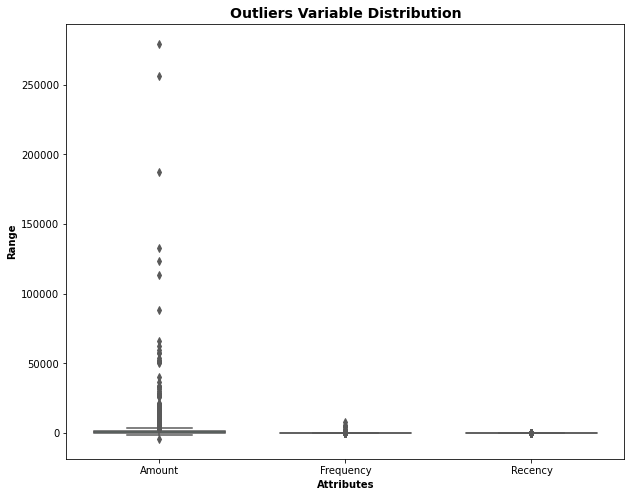

In [20]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfa[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [21]:
# Removing (statistical) outliers for Amount
Q1 = rfa.Amount.quantile(0.05)
Q3 = rfa.Amount.quantile(0.95)
IQR = Q3 - Q1
rfa = rfa[(rfa.Amount >= Q1 - 1.5*IQR) & (rfa.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfa.Recency.quantile(0.05)
Q3 = rfa.Recency.quantile(0.95)
IQR = Q3 - Q1
rfa = rfa[(rfa.Recency >= Q1 - 1.5*IQR) & (rfa.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for frequency
Q1 = rfa.Frequency.quantile(0.05)
Q3 = rfa.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfa = rfa[(rfa.Frequency >= Q1 - 1.5*IQR) & (rfa.Frequency <= Q3 + 1.5*IQR)]



Rescaling the Attributes
It is extremely important to rescale the variables so that they have a comparable scale.| There are two common ways of rescaling:

1. Min-Max scaling

2. Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [22]:
rfa_df = rfa[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfa_df_scaled = scaler.fit_transform(rfa_df)
rfa_df_scaled.shape

<IPython.core.display.Javascript object>

(4293, 3)

In [23]:
rfa_df_scaled = pd.DataFrame(rfa_df_scaled)
rfa_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfa_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


## Step 4 : Building the Model
K-Means Clustering
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

* First we initialize k points, called means, randomly.
* We categorize each item to its closest mean and we update the mean’s coordinates, which are the * * * averages of the items categorized in that mean so far.
* We repeat the process for a given number of iterations and at the end, we have our clusters.

In [24]:
# k-means with some arbitrary k 

kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(rfa_df_scaled)

<IPython.core.display.Javascript object>

KMeans(max_iter=50, n_clusters=5)

#### Finding the Optimal Number of Clusters
Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

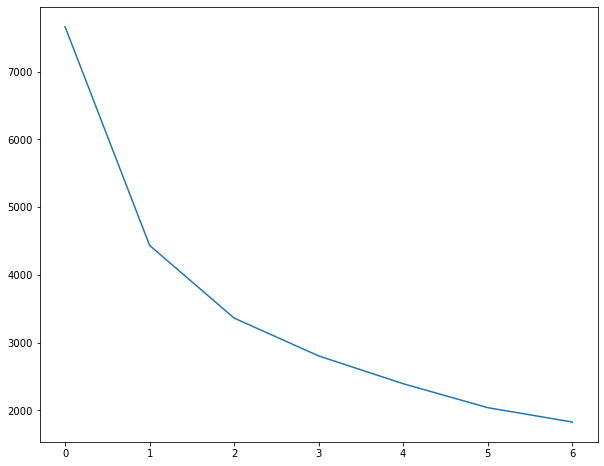

In [25]:
# Elbow-curve/wcss

wcss = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfa_df_scaled)
    
    wcss.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(wcss)

 By visualise a elbow method we can define a k - value  so we use a  KElbowVisualizer library 

<IPython.core.display.Javascript object>

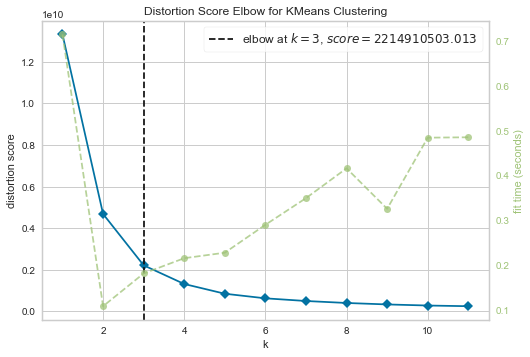

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(rfa_df)
visualizer.show()

Now we can say that there is sudden change in k = 3 than we take k = 3

### Another method for k

Silhouette Analysis
silhouette score=p−qmax(p,q)
 
p  is the mean distance to the points in the nearest cluster that the data point is not a part of
q  is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1.

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [27]:
# Silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfa_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfa_df_scaled, cluster_labels)
    print(f"num_clusters = {num_clusters} , the silhouette score is {silhouette_avg}")

<IPython.core.display.Javascript object>

num_clusters = 2 , the silhouette score is 0.5415858652525395


<IPython.core.display.Javascript object>

num_clusters = 3 , the silhouette score is 0.5084896296141937


<IPython.core.display.Javascript object>

num_clusters = 4 , the silhouette score is 0.4822638541348737


<IPython.core.display.Javascript object>

num_clusters = 5 , the silhouette score is 0.4662700564189704


<IPython.core.display.Javascript object>

num_clusters = 6 , the silhouette score is 0.41742250872395564


<IPython.core.display.Javascript object>

num_clusters = 7 , the silhouette score is 0.41541929125505295


<IPython.core.display.Javascript object>

num_clusters = 8 , the silhouette score is 0.40991484769099323


In [28]:
# Final model with k=3

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfa_df_scaled)

<IPython.core.display.Javascript object>

KMeans(max_iter=50, n_clusters=3)

In [29]:
kmeans.labels_

array([2, 0, 1, ..., 2, 1, 1])

In [30]:
# assign the label
rfa['Cluster_Id'] = kmeans.labels_
rfa.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2


<AxesSubplot:title={'center':'Cluster Id vs Amount'}, xlabel='Cluster_Id', ylabel='Amount'>

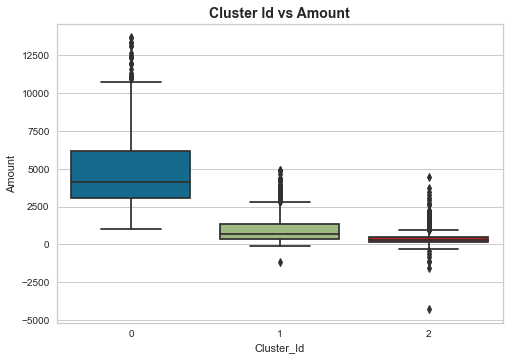

In [31]:
# Box plot to visualize Cluster Id vs Amount
plt.title("Cluster Id vs Amount", fontsize = 14, fontweight = 'bold')
sns.boxplot(x='Cluster_Id', y='Amount', data=rfa)

## Conclusion 
Customers with Cluster Id 0 are the customers with high amount of transactions as compared to other customers.

<AxesSubplot:title={'center':'Cluster Id vs Frequency'}, xlabel='Cluster_Id', ylabel='Frequency'>

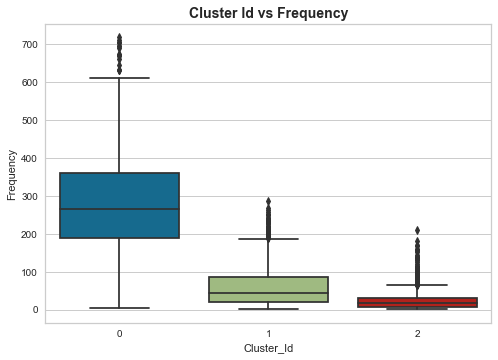

In [32]:
# Plot Cluster Id vs Frequency
plt.title("Cluster Id vs Frequency", fontsize = 14, fontweight = 'bold')
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfa)

## Conclusion
Customers with Cluster Id 0 are frequent buyers.

<AxesSubplot:title={'center':'Cluster Id vs Recency'}, xlabel='Cluster_Id', ylabel='Recency'>

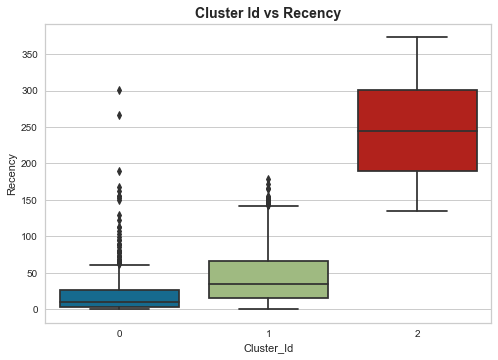

In [33]:
# Plot Cluster Id vs Recency

plt.title("Cluster Id vs Recency", fontsize = 14, fontweight = 'bold')
sns.boxplot(x='Cluster_Id', y='Recency', data=rfa)


## Conclusion


Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.

## Hierarchical Clustering


Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

* Divisive
* Agglomerative.

Average Linkage:

In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.

In [34]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [35]:
mergings = linkage(rfa_df_scaled, method="average", metric='euclidean')
# dendrogram(mergings)

In [36]:
# 3 clusters
cluster_labels = shc.cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
# Assign cluster labels

rfa['Cluster_Labels'] = cluster_labels
rfa.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,0,0
2,12348.0,1797.24,31,74,1,0
3,12349.0,1757.55,73,18,1,0
4,12350.0,334.40,17,309,2,0


<AxesSubplot:xlabel='Cluster_Labels', ylabel='Amount'>

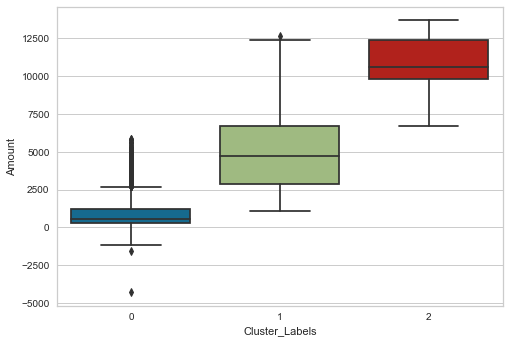

In [38]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='Amount', data=rfa)

Customers with Cluster_Labels 2 are the customers with high amount of transactions as compared to other customers.


<AxesSubplot:xlabel='Cluster_Labels', ylabel='Frequency'>

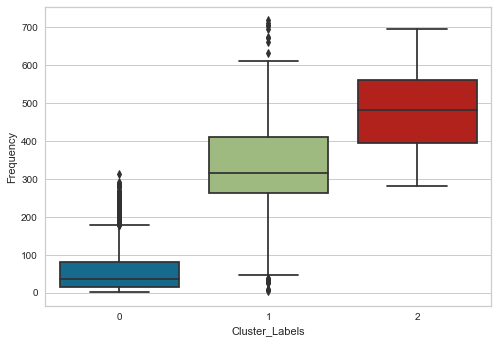

In [39]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfa)

Customers with Cluster_Labels 2 are frequent buyers.

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Recency'>

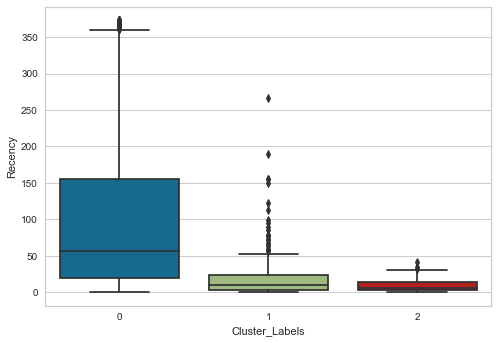

In [40]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=rfa)


Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.